Вариант 5

Файл 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import io

In [2]:
def print_most_freq_symbols(text):
    return max(set(text), key = text.count)

def print_most_freq_bytes(freqs, n):
    freq = freqs.copy()
    tmp = sorted(freq)
    print(f"{n} most common bytes:")
    for i in range(n):
        index = freq.index(tmp[-1 - i])
        percent = round(tmp[-1 - i] / sum(freqs) * 100, 2)
        if percent > 0:
            print(index, f"({percent}%)", end=" ")
            freq[index] = 0
    print("\n")
    
    freq = freqs[:32] + [freqs[127]]
    tmp = sorted(freq)
    print(f"{n} most common bytes of nonprintable ASCII table:")
    for i in range(n):
        index = freq.index(tmp[-1 - i])
        percent = round(tmp[-1 - i] / sum(freqs) * 100, 2)
        if percent > 0:
            print(index, f"({percent}%)", end=" ")
            freq[index] = 0
    print()

def get_byte_freqs(text):
    freqs = [0] * 256
    l = []
    for i in range(len(text)):
        freqs[text[i]] += 1
        l.append(text[i])

    return freqs

def plot_freqs(freqs, bin_number, title):
    l = []
    for i in range(len(freqs)):
        l += [i] * freqs[i]
    plt.figure(figsize=(10, 6))
    plt.xticks(np.arange(0, 256, 10))
    plt.hist(l, edgecolor="white", bins=bin_number, density=True)
    plt.title(title)

Encoding: dos
5 most common bytes:
32 (15.27%) 174 (6.4%) 165 (5.96%) 168 (5.27%) 160 (5.21%) 

5 most common bytes of nonprintable ASCII table:
10 (2.85%) 
--------------------------------------------------
Encoding: iso
5 most common bytes:
32 (15.27%) 222 (6.4%) 213 (5.96%) 216 (5.27%) 208 (5.21%) 

5 most common bytes of nonprintable ASCII table:
10 (2.85%) 
--------------------------------------------------
Encoding: koi8r
5 most common bytes:
32 (15.27%) 207 (6.4%) 197 (5.96%) 201 (5.27%) 193 (5.21%) 

5 most common bytes of nonprintable ASCII table:
10 (2.85%) 
--------------------------------------------------
Encoding: maccyrillic
5 most common bytes:
32 (15.27%) 238 (6.4%) 229 (5.96%) 232 (5.27%) 224 (5.21%) 

5 most common bytes of nonprintable ASCII table:
13 (2.85%) 
--------------------------------------------------
Encoding: utf8
5 most common bytes:
208 (27.33%) 209 (12.32%) 32 (9.21%) 190 (3.86%) 181 (3.6%) 

5 most common bytes of nonprintable ASCII table:
10 (1.72%) 

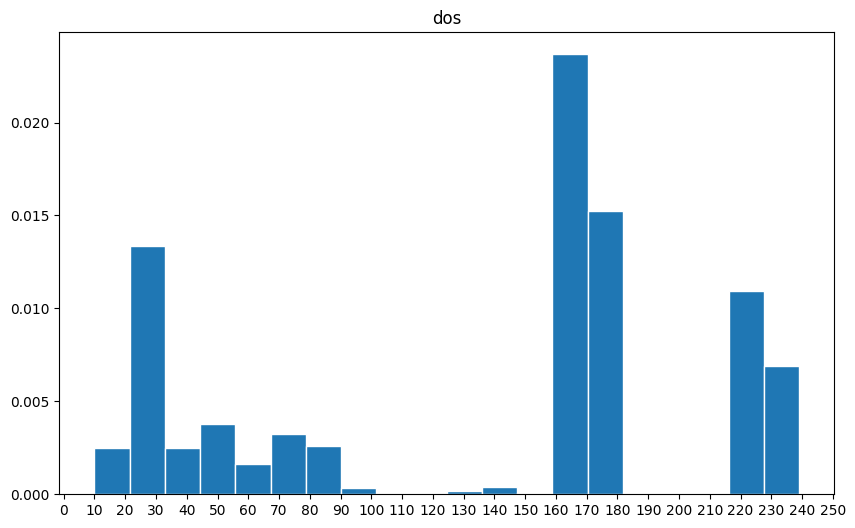

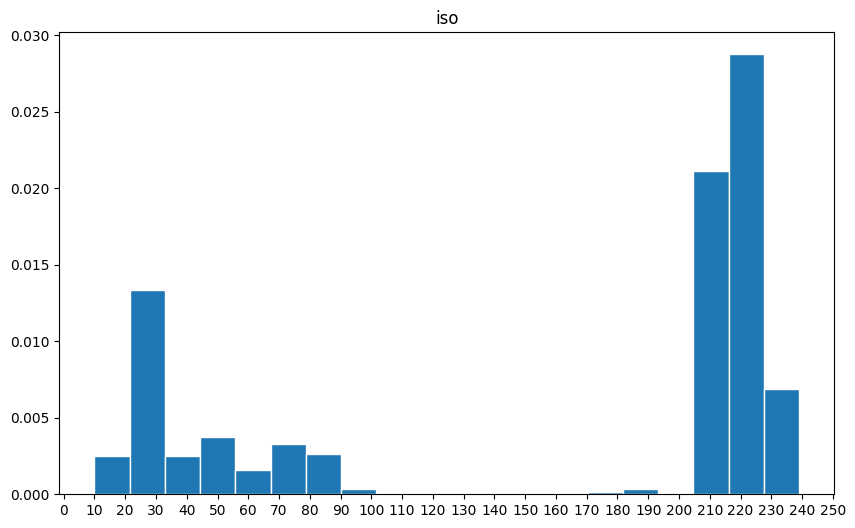

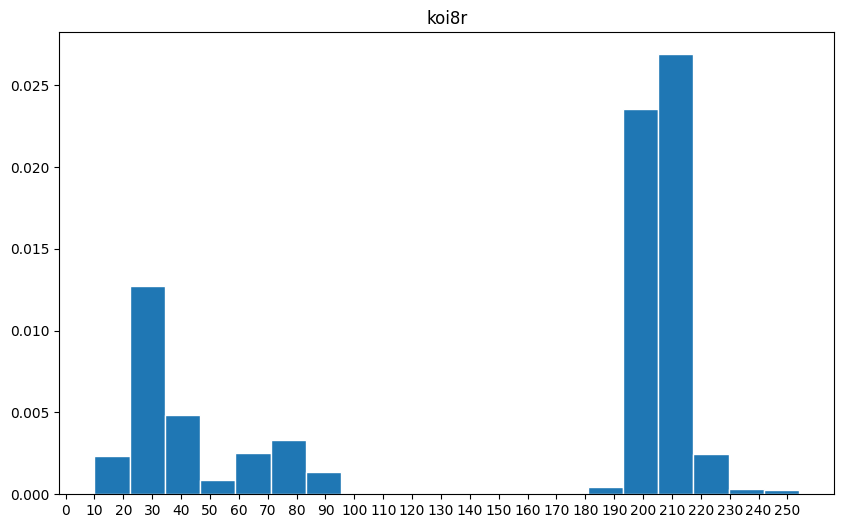

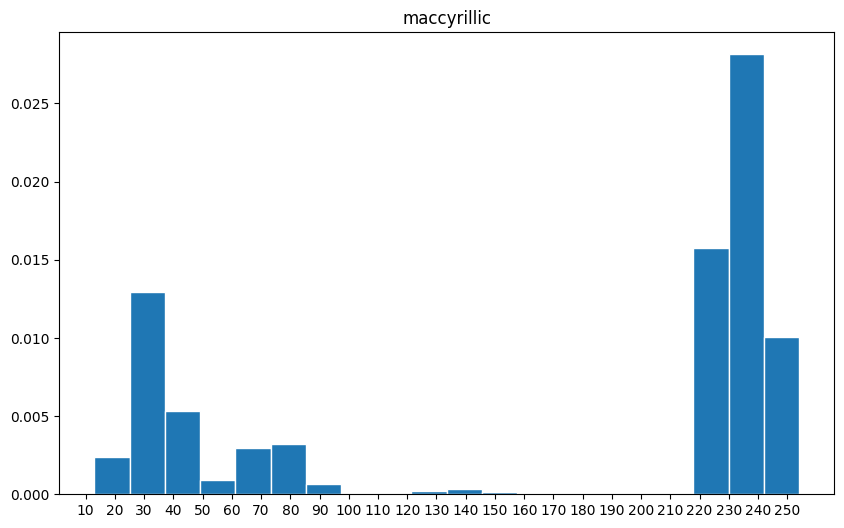

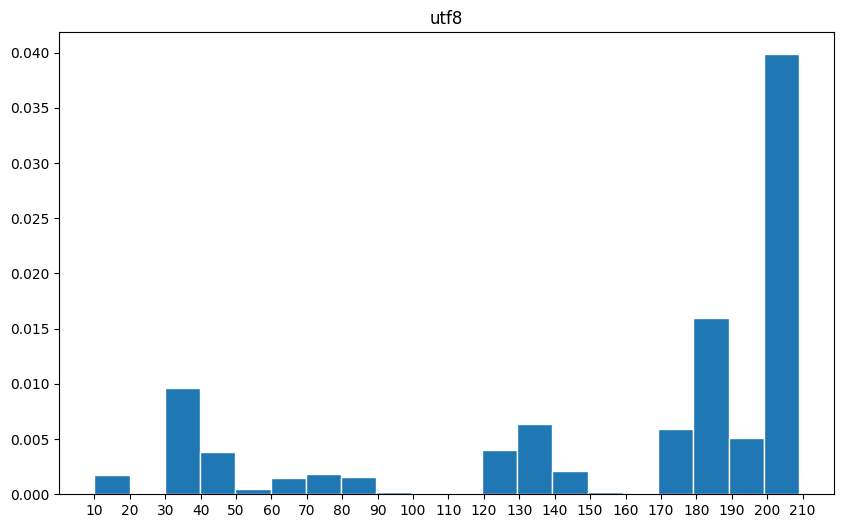

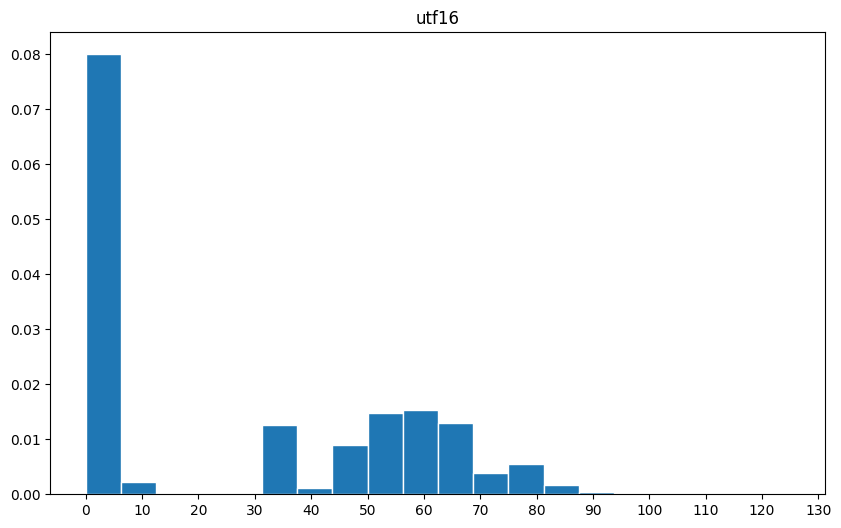

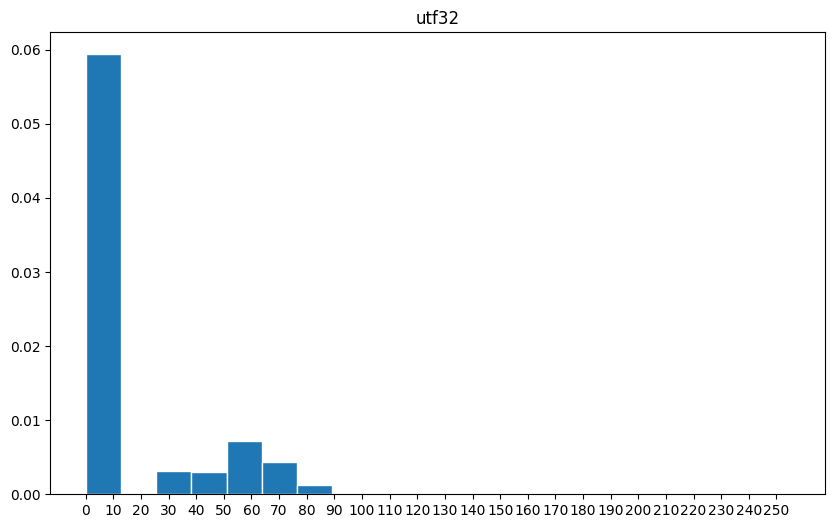

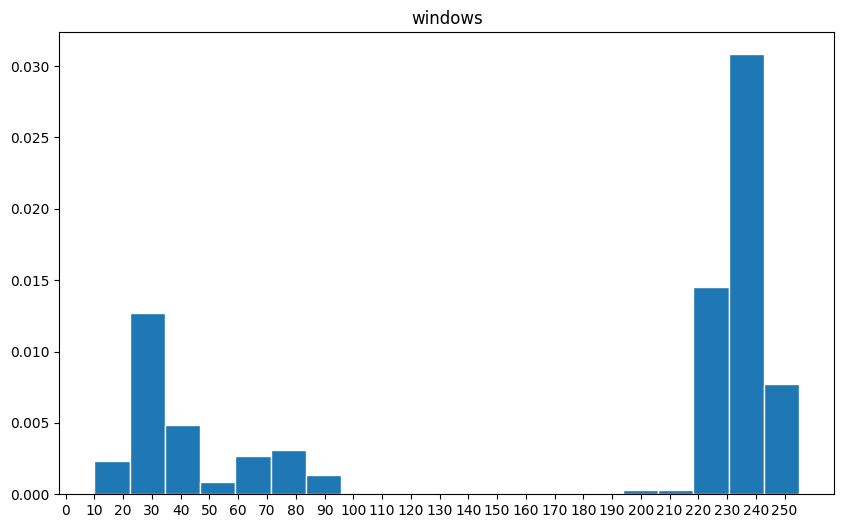

In [3]:
template = "Керниган, Ричи. Язык C — "
extentions = ["dos", "iso", "koi8r", "maccyrillic", "utf8", "utf16", "utf32", "windows"]

N = 5

for ext in extentions:
    print("Encoding:", ext)
    byte_file = open(template + ext + ".txt", "rb")
    byte_text = byte_file.read()
    byte_file.close()
    
    byte_freqs = get_byte_freqs(byte_text)
    print_most_freq_bytes(byte_freqs, N)
    plot_freqs(byte_freqs, 20, ext)
    print("-" * 50)
    
print("Most common symbols in text:")
file = open(template + "utf8" + ".txt", "r")
text = file.read()
file.close()
counter = Counter(text)
[print(f"\"{counter.most_common(N)[i][0]}\" ({round(counter.most_common(N)[i][1] / len(text) * 100, 2)}%)", sep="", end="   ") for i in range(N)];

В многобайтовых кодировках можно увидеть большое преобладание байтов, которые в ASCII отвечают за непечатные символы. В принципе, оценка частот октетов таких кодировок нам мало сможет дать информации.

Для однобайтовых кодировок сделал проверку. Например:
1) В dos: $174_{10}$ - "о", $165_{10}$ - "е", $168_{10}$ - "и", $160_{10}$ - "а";
2) В windows-1251: $238_{10}$ - "о", $229_{10}$ - "е", $232_{10}$ - "и", $224_{10}$ - "а".

Что в точности совпадает с самыми распрострененными буквами в рассмотренном тексте. Для остальных кодировок проверку опущу.

5 most common bytes:
32 (14.8%) 225 (7.93%) 239 (6.58%) 244 (6.37%) 233 (4.79%) 

5 most common bytes of nonprintable ASCII table:
10 (1.92%) 13 (1.92%) 9 (0.18%) 


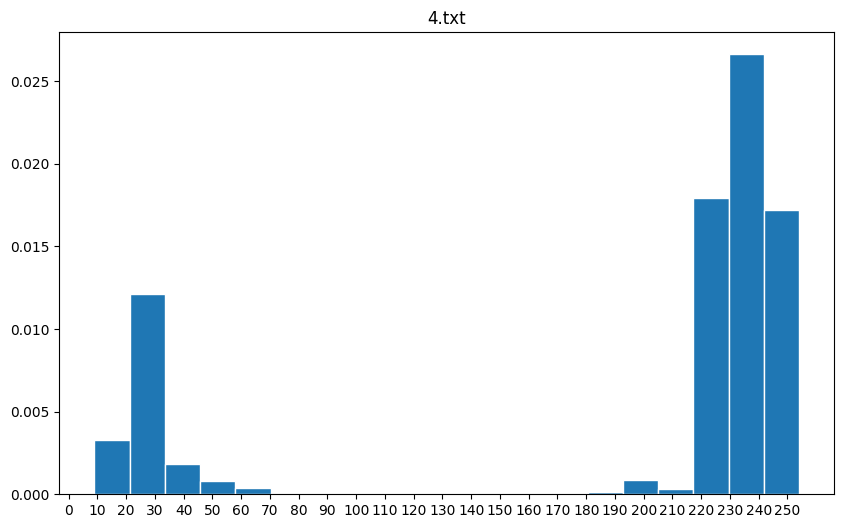

In [4]:
file = open('4.txt','rb')
text = file.read()
file.close()

freqs = get_byte_freqs(text)
print_most_freq_bytes(freqs, N)
plot_freqs(freqs, 20, "4.txt")

По самым распространенным байтам и их частотам можем понять, что текст нерусский, но кодировка однобайтовая.

Текст действительно написан не на русском. Например, с помощью редактора гитлаба можно понять, что текст написан на греческом языке. 

Ради интереса взял файл другого варианта и решил на нем протестировать анализ.

5 most common bytes:
32 (18.16%) 207 (8.71%) 197 (6.44%) 193 (5.81%) 201 (5.45%) 

5 most common bytes of nonprintable ASCII table:
10 (1.38%) 13 (1.38%) 


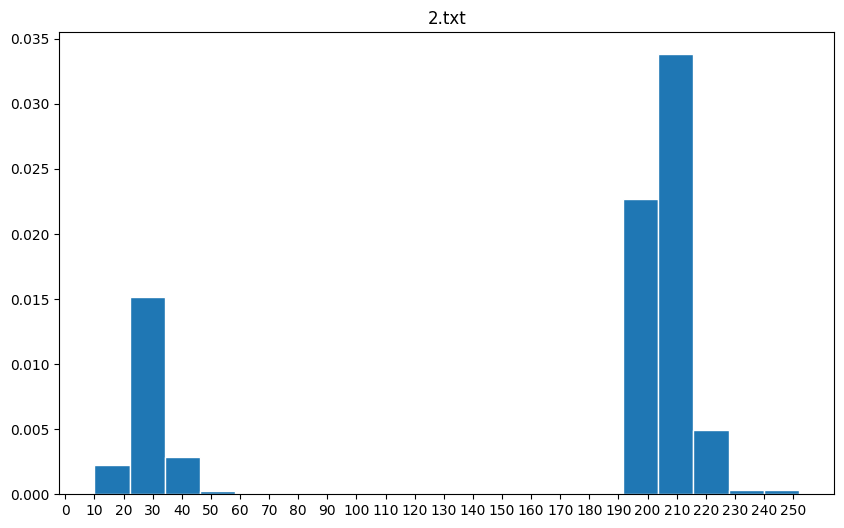

In [5]:
file = open('2.txt','rb')
text = file.read()
file.close()

freqs = get_byte_freqs(text)
print_most_freq_bytes(freqs, N)
plot_freqs(freqs, 20, "2.txt")

Полученные байты крайне похожи на те, что можно встретить в русских текстах закодированных с помощью koi8r. Расшифруем текст:

In [6]:
file = io.open('2.txt',mode='r', encoding="koi8-r")
text = file.read()
file.close()

print(text)

Иосиф Бродский. Полторы комнаты

     В  полутора  комнатах  (если вообще по-английски эта мера  пространства
имеет смысл), где мы жили втроем, был паркетный  пол, и  моя мать решительно
возражала  против того, чтобы члены ее семьи, я  в частности, разгуливали  в
носках.  Она  требовала  от  нас,  чтобы  мы  всегда  ходили в ботинках  или
тапочках.  Выговаривая  мне  по  этому  поводу,  вспоминала  старое  русское
суеверие. "Это дурная примета, -- утверждала она, -- к смерти в доме".
     Может быть,  конечно, она  просто считала  эту  привычку  некультурной,
обычным неумением себя вести. Мужские ноги пахнут, а эпоха дезодорантов  еще
не наступила. И все же я думал, что в  самом деле можно легко поскользнуться
и упасть на до блеска натертом паркете, особенно если ты в шерстяных носках.
И что если ты  хрупок и стар, последствия могут быть ужасны. Связь паркета с
деревом,  землей  и т. д. распространялась  в моем  представлении на  всякую
поверхность под ногами  близких  и дальних родств

Гипотеза подтвердилась